In [31]:
import torch
import torch.nn.functional as F
import sys
try: # whether we're on titanic or not work on my regression_classif branch at least.
    sys.path.append("/home/mathieu/local/py_script/dnadna")
    import net as net_module
except ModuleNotFoundError:
    #sys.path.append("/home/jean/Documents/ML_genetics/dnadna/")
    #import net as net_module
    print("import fail")
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
res= pd.read_csv("/media/mathieu/crucialmx300/skyline/log/600/resfinal.csv")

In [3]:
dfparam = pd.read_csv('/media/mathieu/crucialmx300/exp/BacterialDemoSelection_param', sep="\t", header=0)

In [55]:
res["geneconv_ratio"]=0
res["mu"]=0
res["Ne"]=0
for i in res.index.to_list() :
    scenar = int(res.loc[i,"scenario"])
    recomb = dfparam.loc[scenar,"geneconv_ratio"]
    mu= dfparam.loc[scenar,"mu"]
    ne=dfparam.loc[scenar,"Ne"]
    res.loc[i,"geneconv_ratio"]= recomb
    res.loc[i,"mu"]= mu
    res.loc[i,"Ne"]= ne

In [71]:
res.rename(columns={'recall_x':'after', 'recall_y':'before'}, inplace=True)

In [8]:
res['dif'] = res['after'] - res['before']

In [72]:
res.head()

Unnamed: 0 demo     dom  after  before  scenario   util  geneconv_ratio  \
0           0  Bot  c8_med    0.2     0.3         5  Beast        0.027826   
1           1  Bot  c8_med    0.1     0.2        32  Beast        0.029453   
2           2  Bot  c8_med    0.0     0.4       104  Beast        0.039886   
3           3  Bot  c8_med    0.1     0.4       286  Beast        0.757333   
4           4  Bot  c8_med    0.0     0.3       726  Beast        0.214087   

   dif            mu             Ne  
0 -0.1  8.125000e-10   94181.818182  
1 -0.1  1.079688e-09   20247.933884  
2 -0.4  1.213281e-09  102512.396694  
3 -0.3  1.944336e-09   65876.784373  
4 -0.3  1.845996e-09   60480.841473

<h1>recall post dommage</h1>

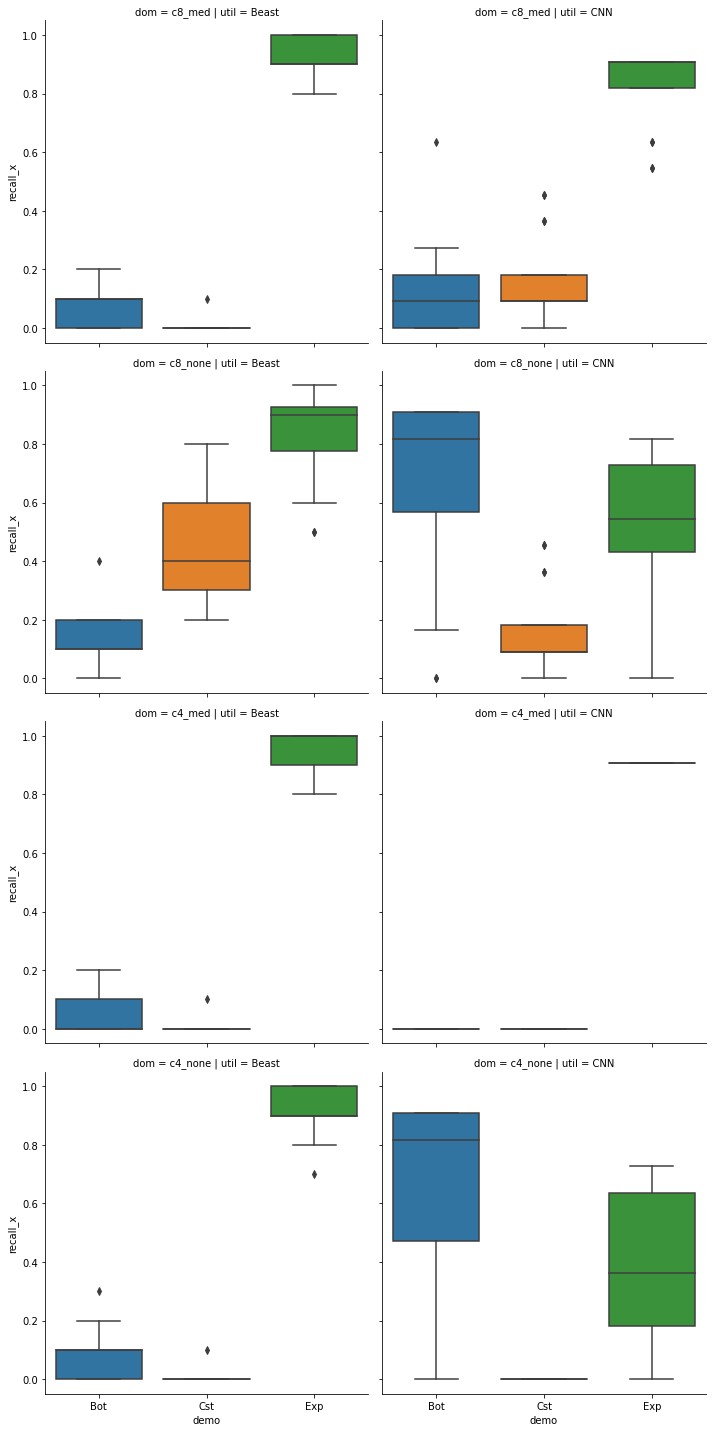

In [62]:
sns.catplot(data=res, y="after", x="demo", row="dom",col="util", kind="box", legend_out=True)

<h1>difference after - before </h1>

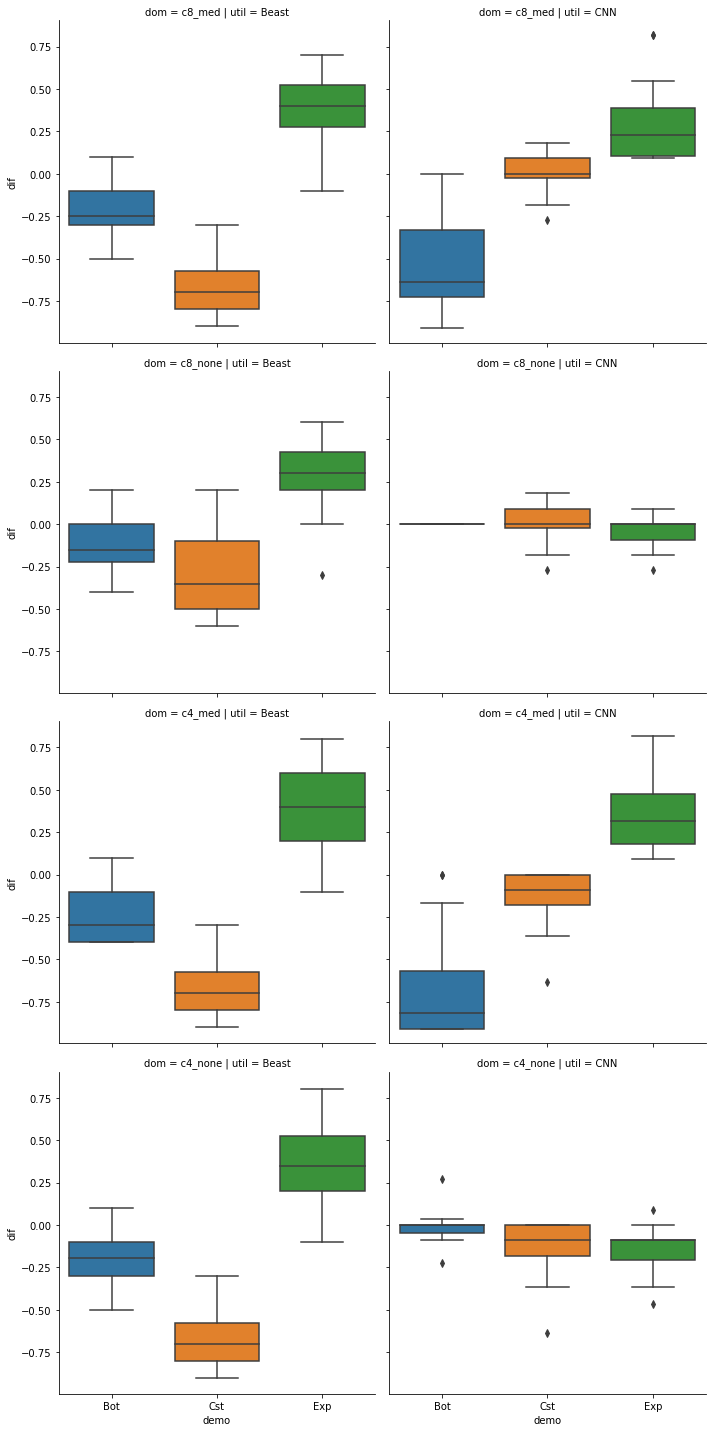

In [22]:
sns.catplot(data=res, y="dif", x="demo", row="dom",col="util", kind="box", legend_out=True)

In [102]:
beast = res[res['util']=='Beast']

In [97]:
cnn = res[res["util"]=="CNN"]

<h1>Test de corrélation</h1>

<h1>Test Ne</h1>

In [74]:
stats.spearmanr(res["Ne"], res["after"])

SpearmanrResult(correlation=-0.08881947910687582, pvalue=0.05280085142675771)

In [75]:
stats.spearmanr(res["Ne"], res["before"])

SpearmanrResult(correlation=0.039632497548684156, pvalue=0.388277919454171)

In [76]:
stats.spearmanr(res["Ne"], res["dif"])

SpearmanrResult(correlation=-0.13244297725602341, pvalue=0.0037948561674471153)

In [108]:
stats.spearmanr(beast["Ne"], beast["dif"])

SpearmanrResult(correlation=-0.186838814198477, pvalue=0.003672445557827254)

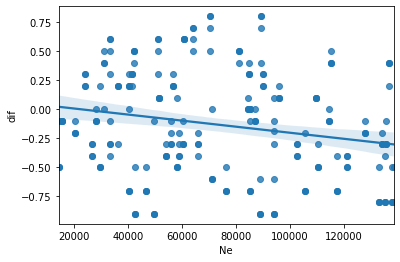

In [110]:
g = sns.regplot(data=beast, y="dif", x="Ne")

Plus Ne est grand, plus les domages ont un impact négatif pour beast

In [109]:
stats.spearmanr(cnn["Ne"], cnn["dif"])

SpearmanrResult(correlation=-0.060738327112514, pvalue=0.35289755970026926)

<h1>Test geneconv_ratio</h1>

In [117]:
stats.spearmanr(res["geneconv_ratio"], res["after"])

SpearmanrResult(correlation=0.046955455074137877, pvalue=0.4728131058661983)

In [78]:
stats.spearmanr(res["geneconv_ratio"], res["before"])

SpearmanrResult(correlation=0.012427078588590828, pvalue=0.7868337447607586)

In [120]:
stats.spearmanr(res["geneconv_ratio"], res["dif"])

SpearmanrResult(correlation=0.011263152216641733, pvalue=0.806383140317997)

pas corrélé

<h1>Test mu</h1>

In [121]:
stats.spearmanr(cnn["mu"], cnn["before"])

SpearmanrResult(correlation=0.3982840761059807, pvalue=2.1422762404957393e-10)

In [122]:
stats.spearmanr(cnn["mu"], cnn["after"])

SpearmanrResult(correlation=0.19246794689095473, pvalue=0.00298909502727308)

In [123]:
stats.spearmanr(cnn["mu"], cnn["dif"])

SpearmanrResult(correlation=-0.16702343521981183, pvalue=0.010160475196436456)

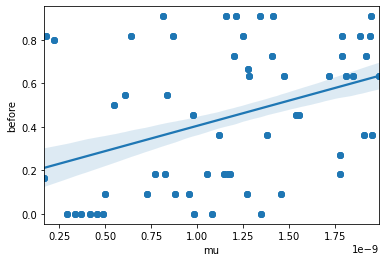

In [98]:
sg = sns.regplot(data=cnn, y="before", x="mu")

recall corrélé avec mu / même aprés avoir ajouté des dommages pour le CNN

In [127]:
stats.spearmanr(beast["mu"], beast["before"])

SpearmanrResult(correlation=-0.1386612499474237, pvalue=0.03176945599674252)

In [128]:
stats.spearmanr(beast["mu"], beast["after"])

SpearmanrResult(correlation=0.07448191223164309, pvalue=0.2503738012126665)

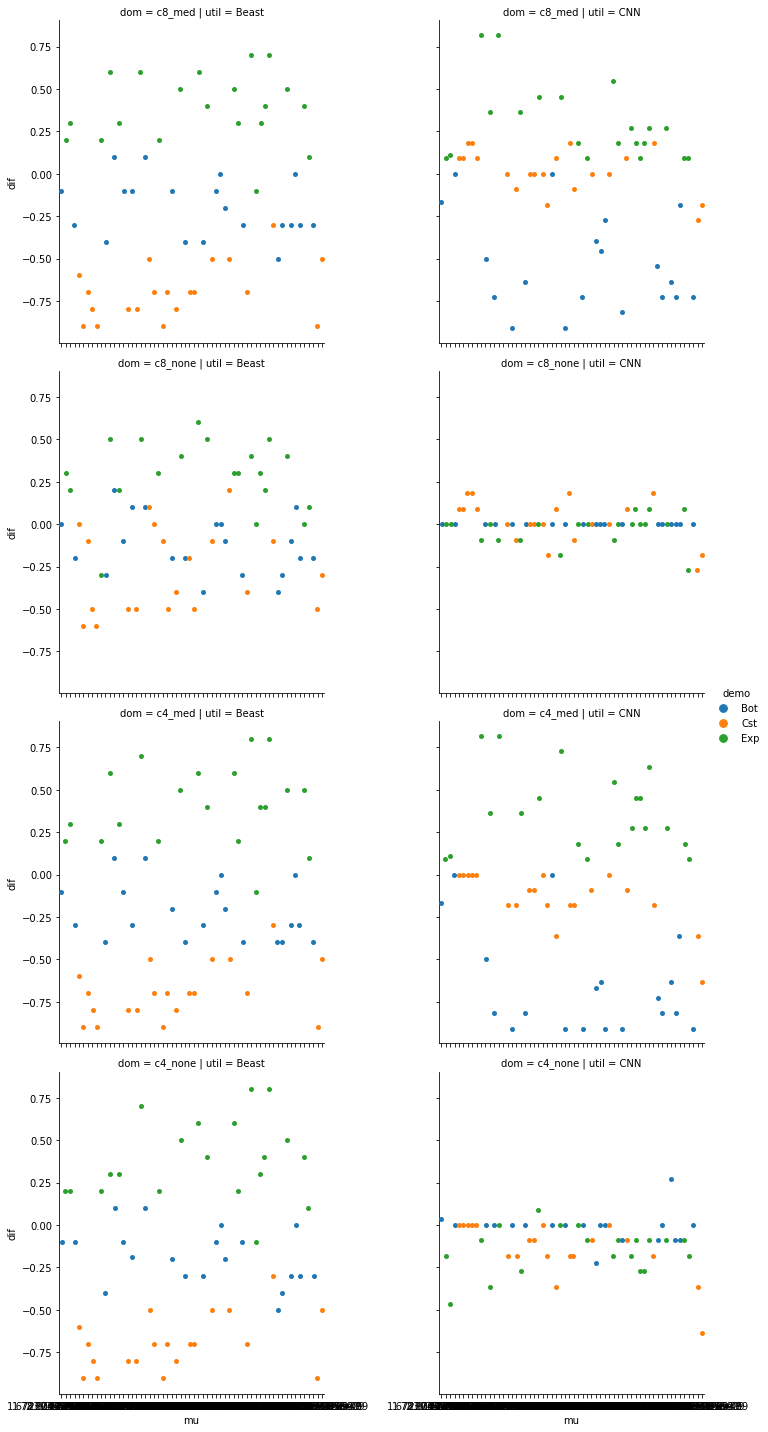

In [129]:
g = sns.catplot(data=res, y="dif", x="mu", row="dom",col="util",hue="demo",kind="strip", legend_out=True)

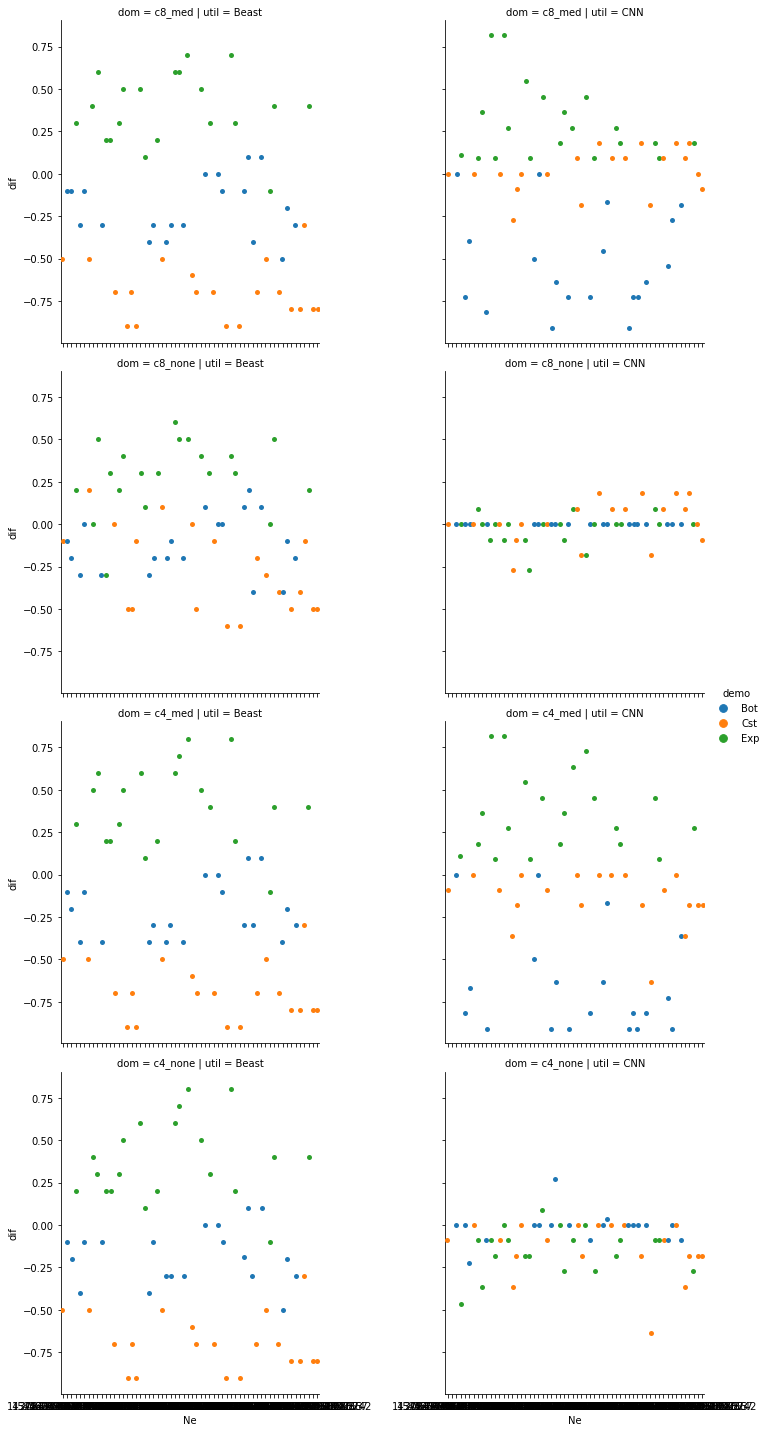

In [130]:
g = sns.catplot(data=res, y="dif", x="Ne", row="dom",col="util",hue="demo",kind="strip", legend_out=True)